# Kidney Disease Dataset EDA

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

pd.set_option('display.max_columns',40)

In [175]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [176]:
df.shape

(400, 26)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [178]:
# id column is giving any help for our EDA, coz it only works as index.
df.drop('id', axis = 1,inplace=True)

In [179]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [180]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [181]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

### handle packed_cell_volume column

In [183]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [184]:
def get_numeric(x):
    if x == np.nan:
        return x
    elif str(x).isdigit():
        return int(x)
    else:
        return np.nan
df['packed_cell_volume'] = df['packed_cell_volume'].apply(get_numeric)
df['packed_cell_volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

#### another method to convert object to numeric

In [185]:
# or we can do another method --
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')  #ignore the null/lpha values, supress the errors.
df['packed_cell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [186]:
df['packed_cell_volume'].fillna(int(df['packed_cell_volume'].mean()), inplace=True)
df['packed_cell_volume'] = df['packed_cell_volume'].astype(int)
df['packed_cell_volume'].unique()

array([44, 38, 31, 32, 35, 39, 36, 33, 29, 28, 16, 24, 37, 30, 34, 40, 45,
       27, 48, 52, 14, 22, 18, 42, 17, 46, 23, 19, 25, 41, 26, 15, 21, 43,
       20, 47,  9, 49, 50, 53, 51, 54])

### handle white_blood_cell_count column

In [187]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [188]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['white_blood_cell_count'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [189]:
df.fillna(float(df['white_blood_cell_count'].mean()), inplace=True)
df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(int)
df['white_blood_cell_count'].unique()

array([ 7800,  6000,  7500,  6700,  7300,  8406,  6900,  9600, 12100,
        4500, 12200, 11000,  3800, 11400,  5300,  9200,  6200,  8300,
        8400, 10300,  9800,  9100,  7900,  6400,  8600, 18900, 21600,
        4300,  8500, 11300,  7200,  7700, 14600,  6300,  7100, 11800,
        9400,  5500,  5800, 13200, 12500,  5600,  7000, 11900, 10400,
       10700, 12700,  6800,  6500, 13600, 10200,  9000, 14900,  8200,
       15200,  5000, 16300, 12400, 10500,  4200,  4700, 10900,  8100,
        9500,  2200, 12800, 11200, 19100, 12300, 16700,  2600, 26400,
        8800,  7400,  4900,  8000, 12000, 15700,  4100,  5700, 11500,
        5400, 10800,  9900,  5200,  5900,  9300,  9700,  5100,  6600])

### handle red_blood_cell_count column

In [190]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'].unique()

array([5.20000000e+00, 8.40612245e+03, 3.90000000e+00, 4.60000000e+00,
       4.40000000e+00, 5.00000000e+00, 4.00000000e+00, 3.70000000e+00,
       3.80000000e+00, 3.40000000e+00, 2.60000000e+00, 2.80000000e+00,
       4.30000000e+00, 3.20000000e+00, 3.60000000e+00, 4.10000000e+00,
       4.90000000e+00, 2.50000000e+00, 4.20000000e+00, 4.50000000e+00,
       3.10000000e+00, 4.70000000e+00, 3.50000000e+00, 6.00000000e+00,
       2.10000000e+00, 5.60000000e+00, 2.30000000e+00, 2.90000000e+00,
       2.70000000e+00, 8.00000000e+00, 3.30000000e+00, 3.00000000e+00,
       2.40000000e+00, 4.80000000e+00,            nan, 5.40000000e+00,
       6.10000000e+00, 6.20000000e+00, 6.30000000e+00, 5.10000000e+00,
       5.80000000e+00, 5.50000000e+00, 5.30000000e+00, 6.40000000e+00,
       5.70000000e+00, 5.90000000e+00, 6.50000000e+00])

<Axes: >

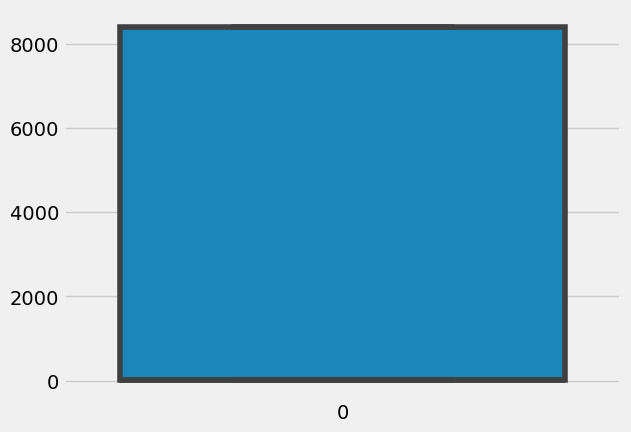

In [191]:
sns.boxplot(df['red_blood_cell_count'])

In [192]:
df.fillna(int(df['red_blood_cell_count'].median()), inplace=True)
# df['red_blood_cell_count'] = df['red_blood_cell_count'].astype(int)
df['red_blood_cell_count'].unique()

array([5.20000000e+00, 8.40612245e+03, 3.90000000e+00, 4.60000000e+00,
       4.40000000e+00, 5.00000000e+00, 4.00000000e+00, 3.70000000e+00,
       3.80000000e+00, 3.40000000e+00, 2.60000000e+00, 2.80000000e+00,
       4.30000000e+00, 3.20000000e+00, 3.60000000e+00, 4.10000000e+00,
       4.90000000e+00, 2.50000000e+00, 4.20000000e+00, 4.50000000e+00,
       3.10000000e+00, 4.70000000e+00, 3.50000000e+00, 6.00000000e+00,
       2.10000000e+00, 5.60000000e+00, 2.30000000e+00, 2.90000000e+00,
       2.70000000e+00, 8.00000000e+00, 3.30000000e+00, 3.00000000e+00,
       2.40000000e+00, 4.80000000e+00, 5.40000000e+00, 6.10000000e+00,
       6.20000000e+00, 6.30000000e+00, 5.10000000e+00, 5.80000000e+00,
       5.50000000e+00, 5.30000000e+00, 6.40000000e+00, 5.70000000e+00,
       5.90000000e+00, 6.50000000e+00])

### get categorical/non-categorical columns

In [193]:
numerical_columns = [cols for cols in df.columns if df[cols].dtype != 'object']
categorical_columns = [cols for cols in df.columns if df[cols].dtype == 'object']

In [194]:
numerical_columns

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [195]:
categorical_columns

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

### unique values in all categorical columns

In [196]:
for col in categorical_columns:
    print(f'{col} has {df[col].unique()}  values. \n')

red_blood_cells has [8406.122448979591 'normal' 'abnormal']  values. 

pus_cell has ['normal' 'abnormal' 8406.122448979591]  values. 

pus_cell_clumps has ['notpresent' 'present' 8406.122448979591]  values. 

bacteria has ['notpresent' 'present' 8406.122448979591]  values. 

hypertension has ['yes' 'no' 8406.122448979591]  values. 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' 8406.122448979591]  values. 

coronary_artery_disease has ['no' 'yes' '\tno' 8406.122448979591]  values. 

appetite has ['good' 'poor' 8406.122448979591]  values. 

peda_edema has ['no' 'yes' 8406.122448979591]  values. 

aanemia has ['no' 'yes' 8406.122448979591]  values. 

class has ['ckd' 'ckd\t' 'notckd']  values. 



* we have seen that  `8406.122448979591` value has occured in almost all categorical columns. Let's check its occurrence.

In [197]:
df[df['red_blood_cell_count'] == 8406.122448979591]

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
1,7.0,50.0,1.020000,4.000000,0.000000,8406.122449,normal,notpresent,notpresent,8406.122449,18.0,0.8,8406.122449,8406.122449,11.300000,38,6000,8406.122449,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010000,2.000000,3.000000,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,8406.122449,8406.122449,9.600000,31,7500,8406.122449,no,yes,no,poor,no,yes,ckd
6,68.0,70.0,1.010000,0.000000,0.000000,8406.122449,normal,notpresent,notpresent,100.000000,54.0,24.0,104.000000,4.000000,12.400000,36,8406,8406.122449,no,no,no,good,no,no,ckd
10,50.0,60.0,1.010000,2.000000,4.000000,8406.122449,abnormal,present,notpresent,490.000000,55.0,4.0,8406.122449,8406.122449,9.400000,28,8406,8406.122449,yes,yes,no,good,no,yes,ckd
13,68.0,70.0,8406.122449,8406.122449,8406.122449,8406.122449,8406.122449,notpresent,notpresent,98.000000,86.0,4.6,135.000000,3.400000,9.800000,38,8406,8406.122449,yes,yes,yes,poor,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,39.0,70.0,1.025000,0.000000,0.000000,normal,normal,notpresent,notpresent,124.000000,22.0,0.6,137.000000,3.800000,13.400000,43,8406,8406.122449,no,no,no,good,no,no,notckd
302,29.0,70.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,127.000000,44.0,1.2,145.000000,5.000000,14.800000,48,8406,8406.122449,no,no,no,good,no,no,notckd
319,30.0,60.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,138.000000,15.0,1.1,135.000000,4.400000,8406.122449,38,8406,8406.122449,no,no,no,good,no,no,notckd
324,40.0,80.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,119.000000,15.0,0.7,150.000000,4.900000,8406.122449,38,8406,8406.122449,no,no,no,good,no,no,notckd


In [198]:
for col in categorical_columns:
    df[col].replace(to_replace = {8406.122448979591 : np.nan}, inplace = True)

In [199]:
for col in categorical_columns:
    print(f'{col} has {df[col].unique()}  values. \n')

# df['red_blood_cells'].unique()

red_blood_cells has [nan 'normal' 'abnormal']  values. 

pus_cell has ['normal' 'abnormal' nan]  values. 

pus_cell_clumps has ['notpresent' 'present' nan]  values. 

bacteria has ['notpresent' 'present' nan]  values. 

hypertension has ['yes' 'no' nan]  values. 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]  values. 

coronary_artery_disease has ['no' 'yes' '\tno' nan]  values. 

appetite has ['good' 'poor' nan]  values. 

peda_edema has ['no' 'yes' nan]  values. 

aanemia has ['no' 'yes' nan]  values. 

class has ['ckd' 'ckd\t' 'notckd']  values. 



### handle unknown value  `8406.122448979591` from numerical data

In [200]:
for col in numerical_columns:
    df[col].replace(to_replace = {8406.122448979591 : np.nan}, inplace = True)

In [201]:
for col in numerical_columns:
    print(f'{col} has {df[col].unique()}  values. \n')

# df['red_blood_cells'].unique()

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]  values. 

blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]  values. 

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025]  values. 

albumin has [ 1.  4.  2.  3.  0. nan  5.]  values. 

sugar has [ 0.  3.  4.  1. nan  2.  5.]  values. 

blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 

### handle distorted values

In [202]:
df['diabetes_mellitus'].replace(to_replace={'\tno':'no', '\tyes':'yes',' yes':'yes'}, inplace=True)
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [203]:
df['coronary_artery_disease'].replace(to_replace={'\tno':'no', '\tyes':'yes',' yes':'yes'}, inplace=True)
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [204]:
df['class'].replace(to_replace={'ckd\t':'ckd'}, inplace=True)
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [205]:
df['class'] = df['class'].map({'ckd':0 , 'notckd':1})

In [206]:
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [207]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [209]:
df['age'].unique()

array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
       19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

In [ ]:

# df['age'].dropna(inplace=True)
# df['age'].fillna(int(df['age'].mean()), inplace=True)


Text(0, 0.5, 'Frequency')

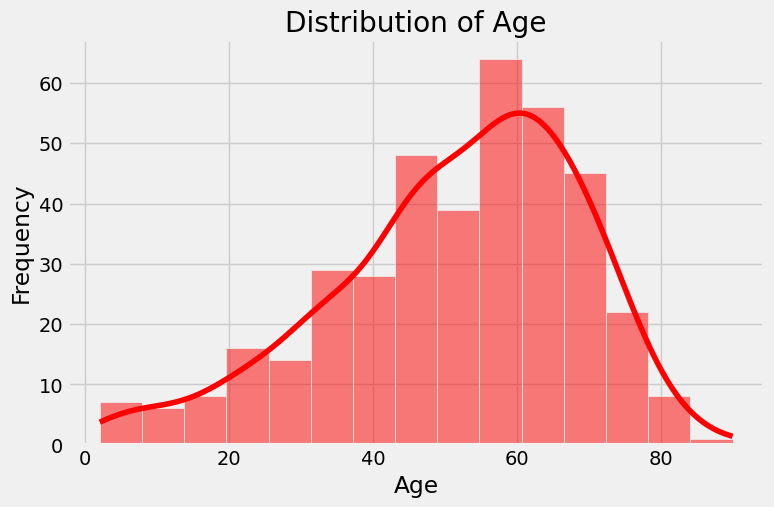

In [211]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'].dropna(), kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


### Insights

* It is left skewed distribution, more people on younger side
* Most people lie between 40-60 years of age
* mean age is around 50
* 70-80 people are low in number

In [212]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [213]:
df['hypertension'].unique()

array(['yes', 'no', nan], dtype=object)

* it is a categorical column

Text(0, 0.5, 'Frequency')

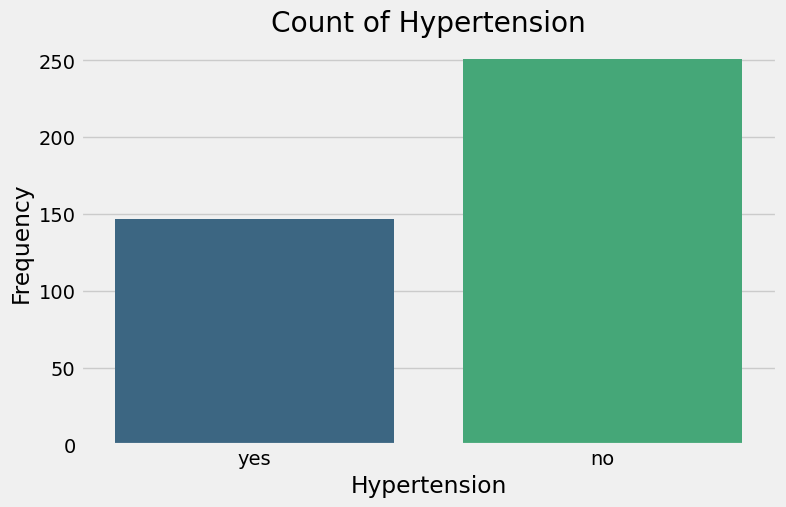

In [216]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='hypertension', palette='viridis')
plt.title('Count of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Frequency')


### finding outliers

Text(0.5, 1.0, 'Boxplot of class via blood_urea')

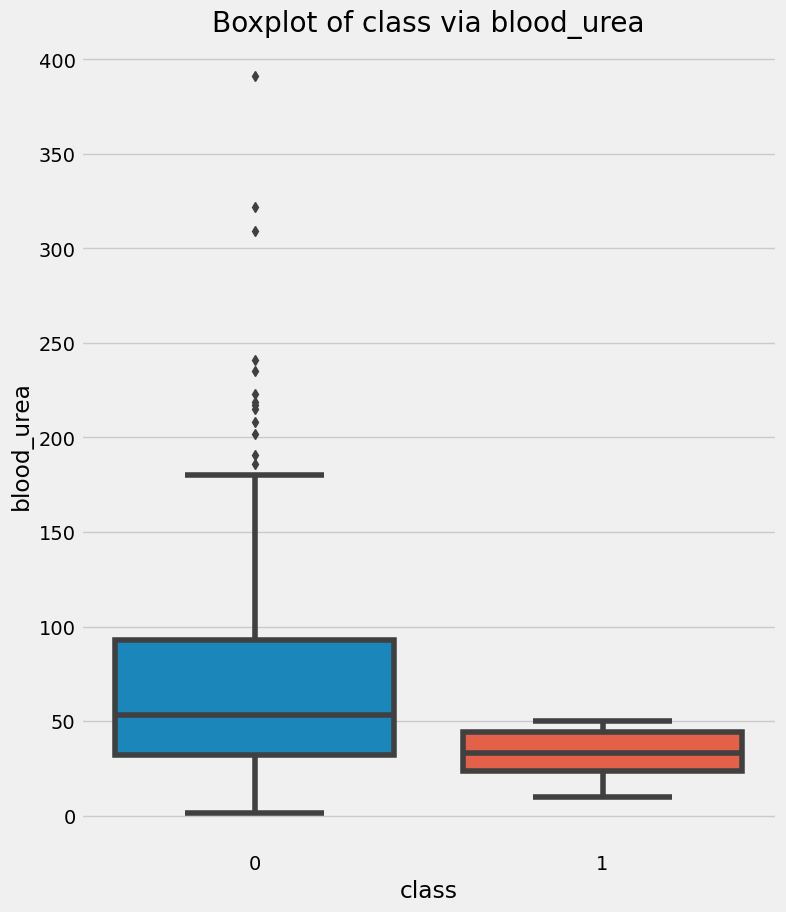

In [218]:
plt.figure(figsize = (8,10))
sns.boxplot(x = 'class', y = 'blood_urea', data = df)
plt.xlabel('class')
plt.ylabel('blood_urea')
plt.title('Boxplot of class via blood_urea')

Text(0.5, 1.0, 'Boxplot of class via serum_creatinine')

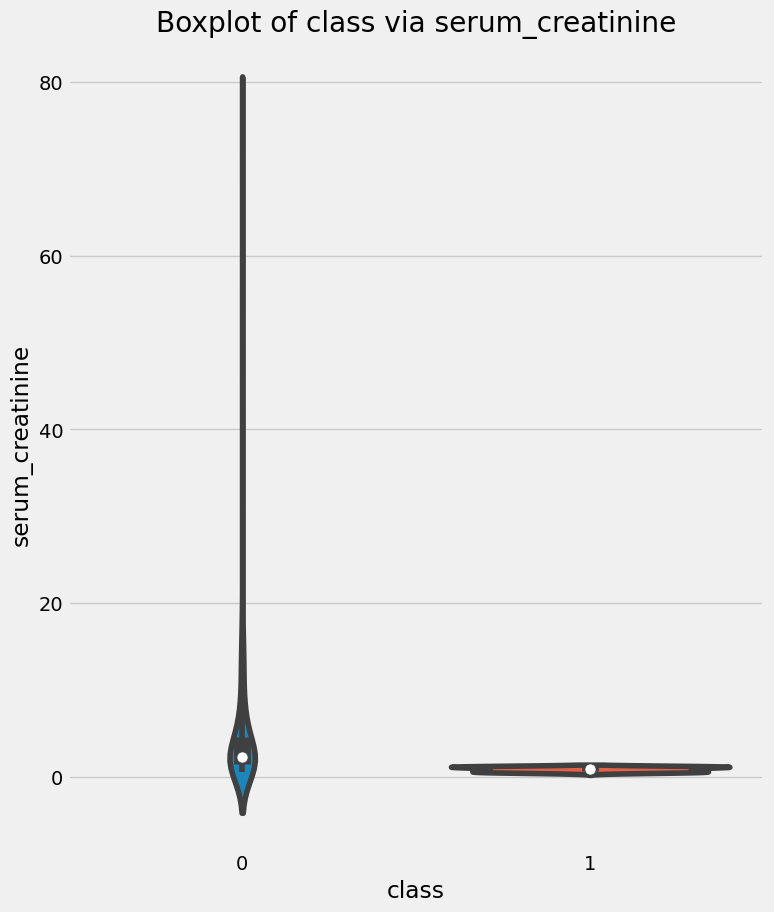

In [220]:
plt.figure(figsize=(8,10))
sns.violinplot(x = 'class', y = 'serum_creatinine', data = df)
plt.xlabel('class')
plt.ylabel('serum_creatinine')
plt.title('Boxplot of class via serum_creatinine')

<Axes: xlabel='aanemia', ylabel='count'>

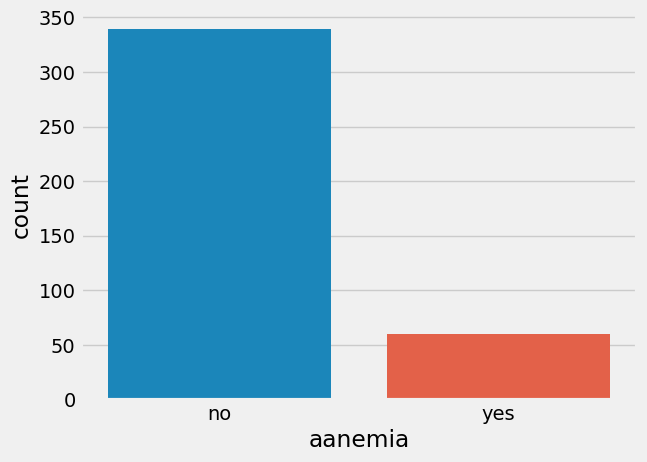

In [221]:
sns.countplot(x='aanemia', data=df)

In [222]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: ylabel='appetite'>

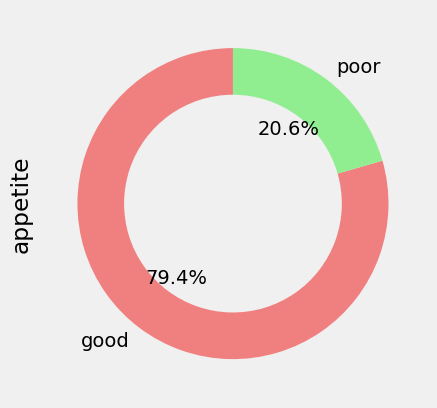

In [225]:
df['appetite'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral','lightgreen'], wedgeprops = dict(width= 0.3), startangle = 90)

<Axes: ylabel='appetite'>

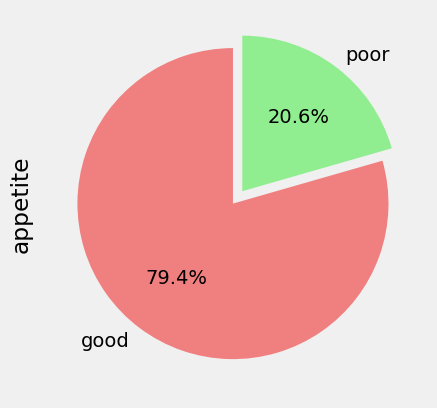

In [232]:
df['appetite'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral','lightgreen'], explode=(0,0.1), startangle = 90)

<Axes: xlabel='peda_edema', ylabel='count'>

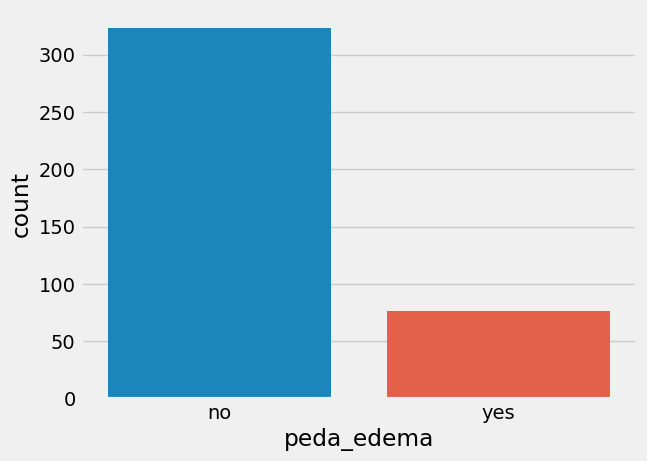

In [233]:
sns.countplot(x = df['peda_edema'])

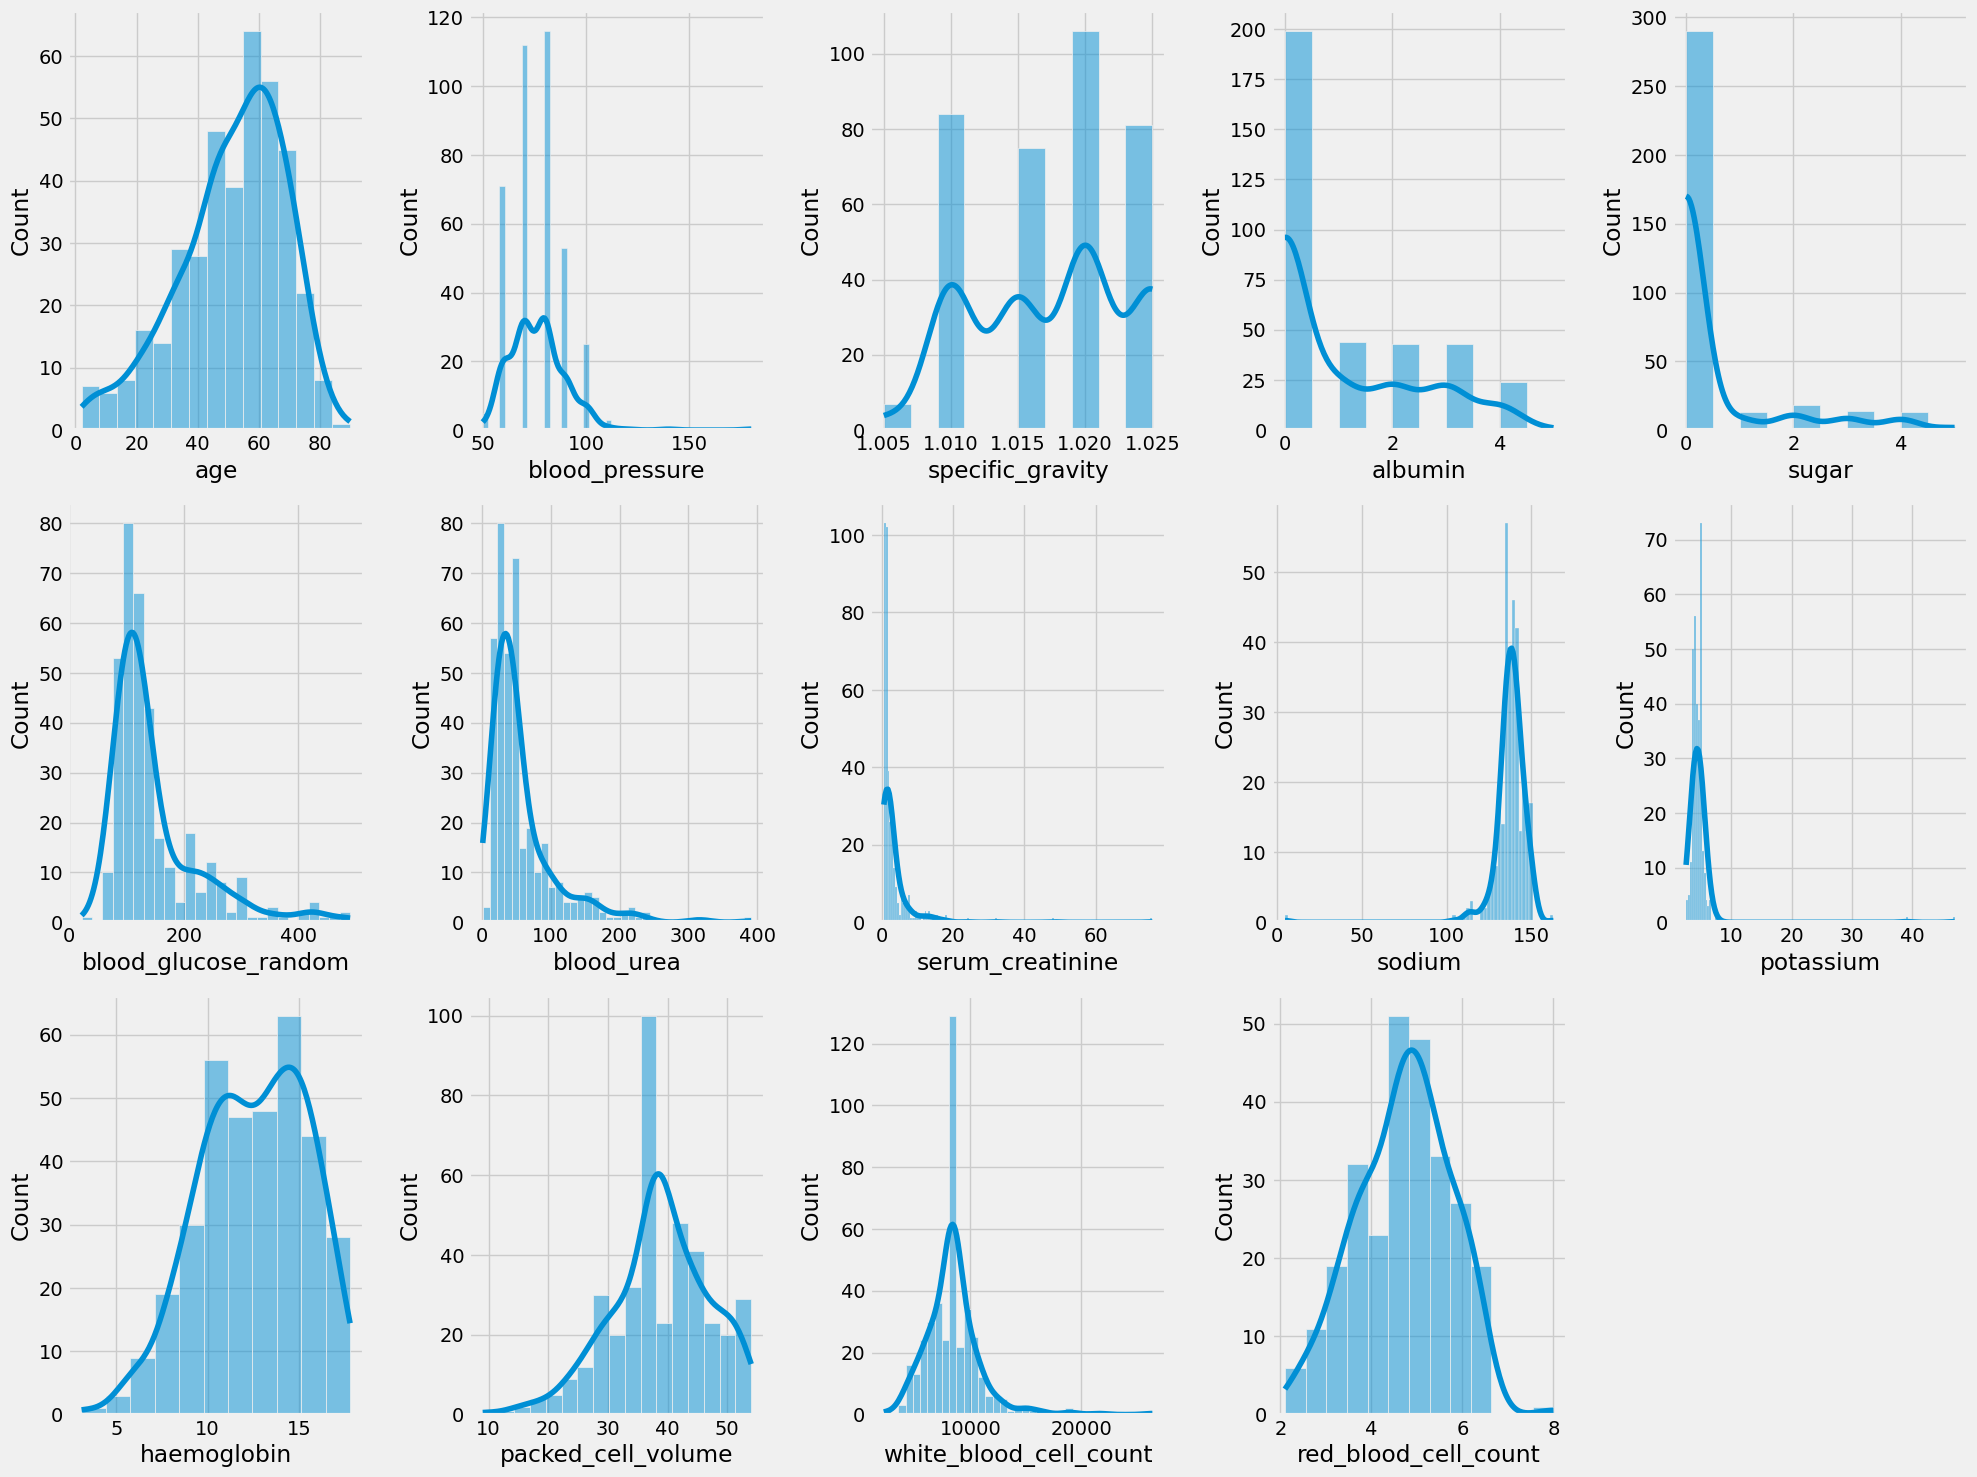

In [235]:
plt.figure(figsize = (20,15))
plt_num=1
for col in numerical_columns:
    if plt_num<=15:
        ax = plt.subplot(3,5,plt_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col)
    plt_num +=1
plt.tight_layout()
plt.show()


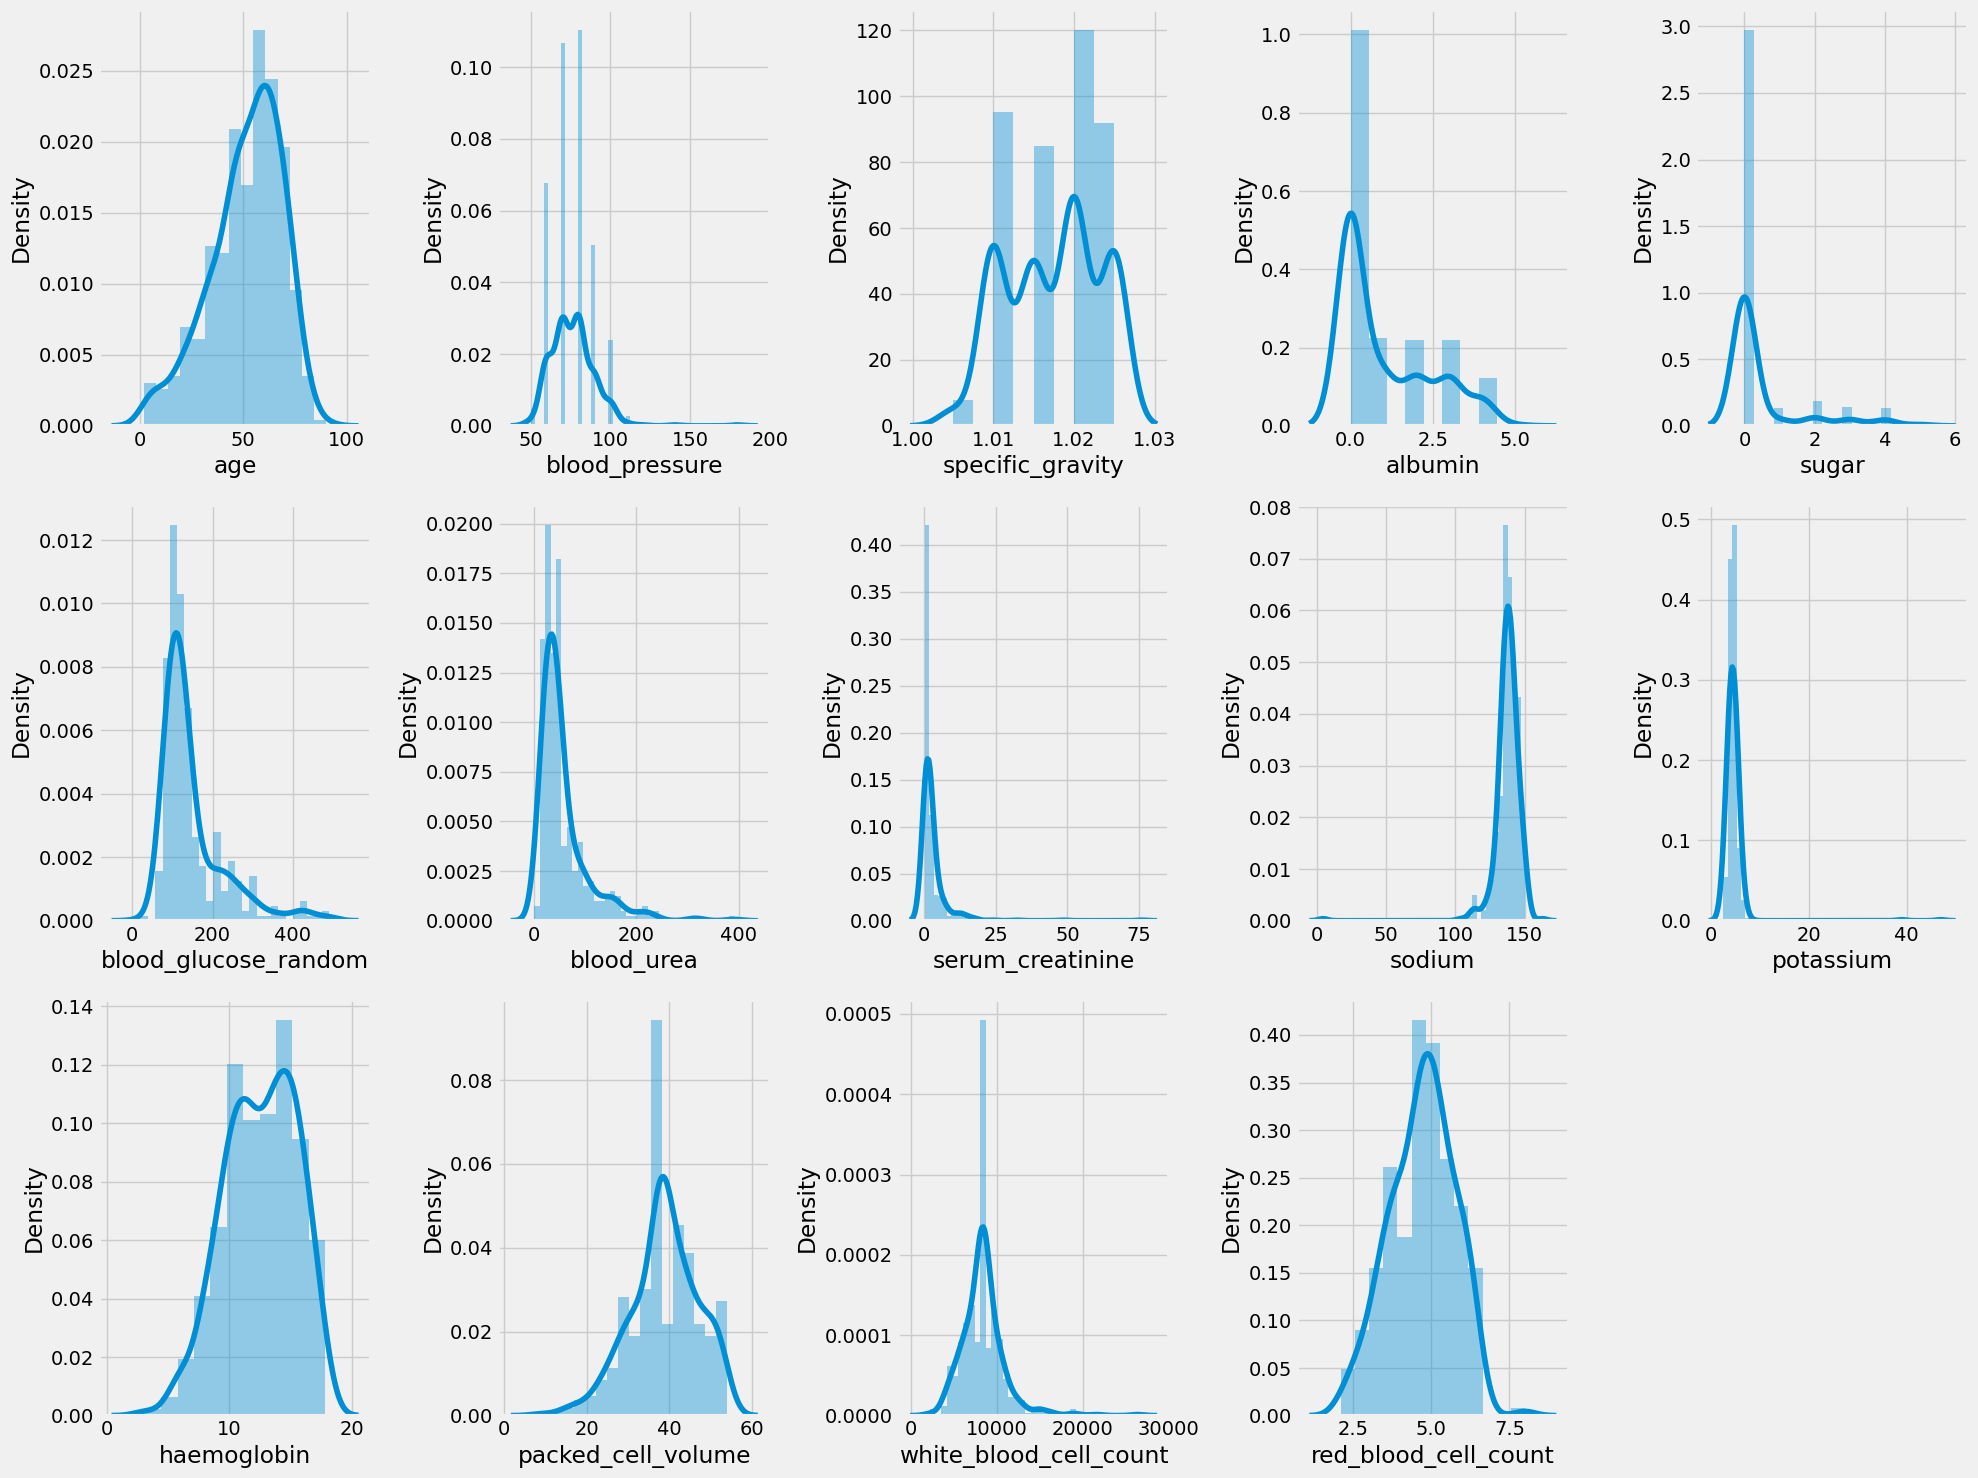

In [236]:
plt.figure(figsize = (20,15))
plt_num=1
for col in numerical_columns:
    if plt_num<=15:
        ax = plt.subplot(3,5,plt_num)
        sns.distplot(df[col])
        plt.xlabel(col)
    plt_num +=1
plt.tight_layout()
plt.show()


In [239]:
def kde(col):
    grid = sns.FacetGrid(df, hue = 'class', height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()


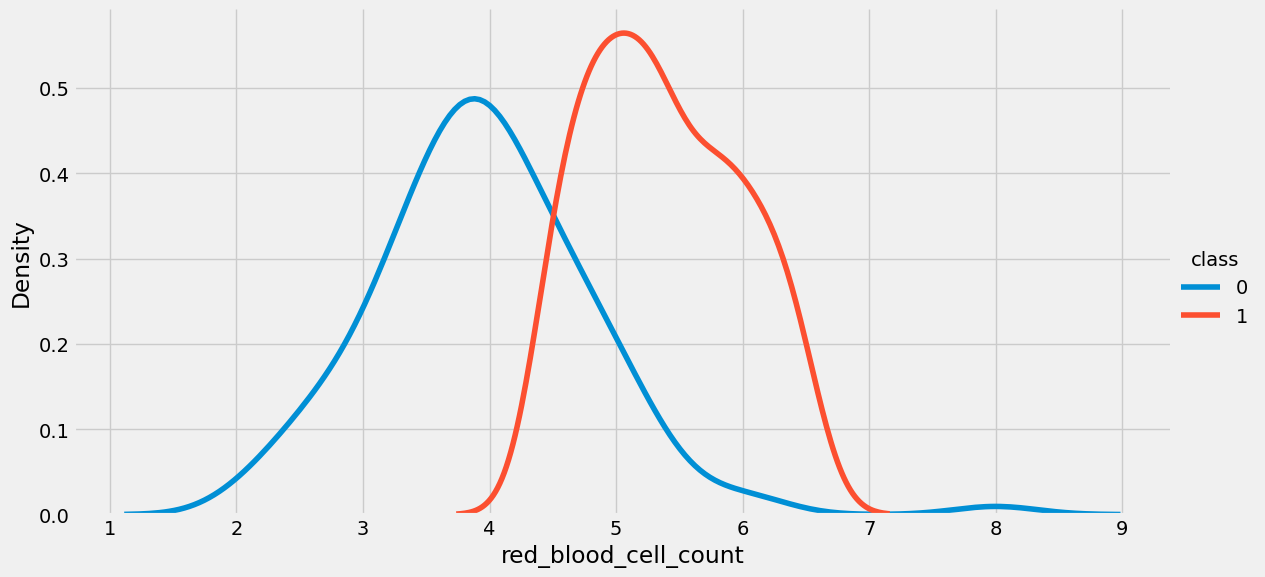

In [240]:
kde('red_blood_cell_count')

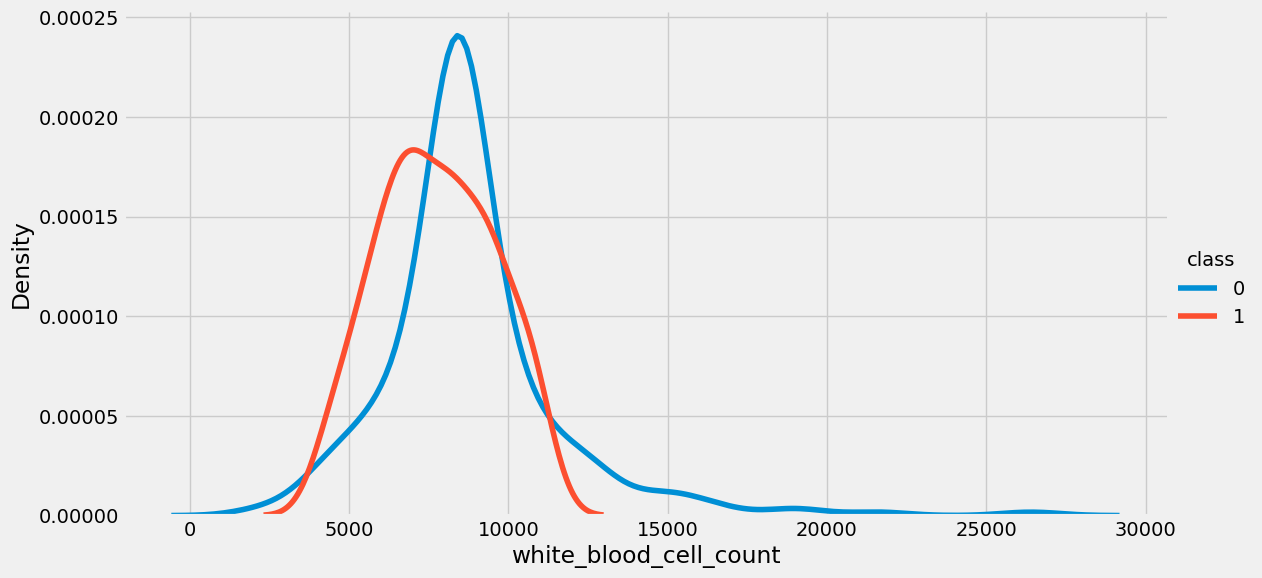

In [241]:
kde('white_blood_cell_count')

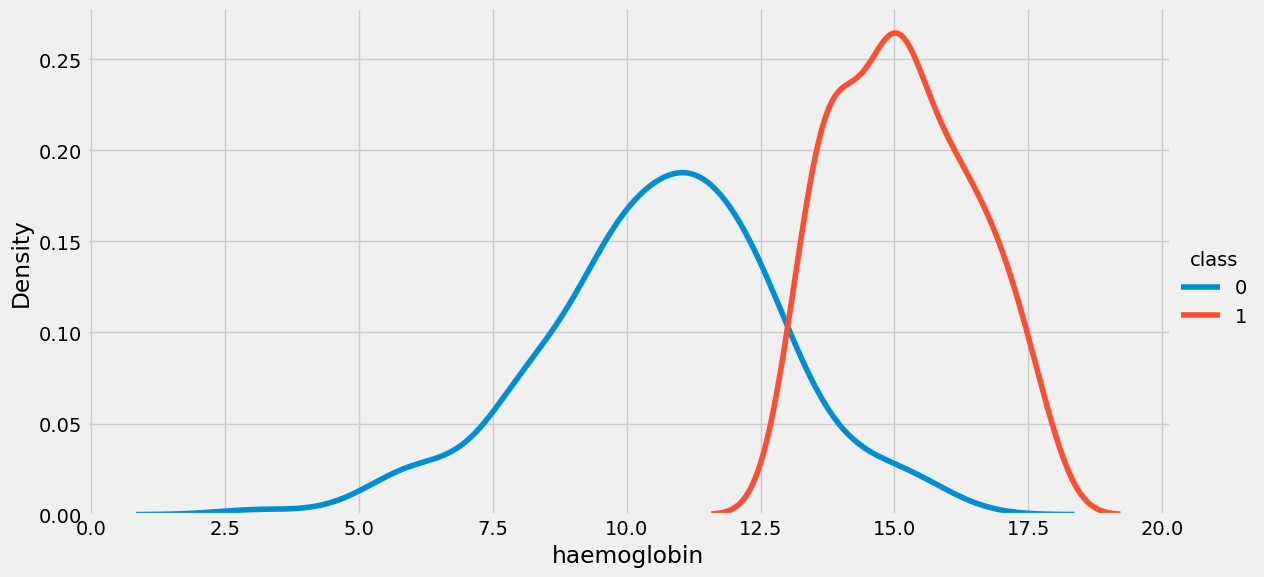

In [242]:
kde('haemoglobin')

In [243]:
def violin(col):
    fig = px.violin(df, y=col, x='class', box =True, template = 'plotly_dark')
    return fig.show()

In [244]:
violin('haemoglobin')

In [245]:
#insights >> outliers are present, 3.1 and 4.8, 16.1 for class 0

violin('packed_cell_volume')

In [246]:
violin('specific_gravity')

<Axes: xlabel='age', ylabel='blood_pressure'>

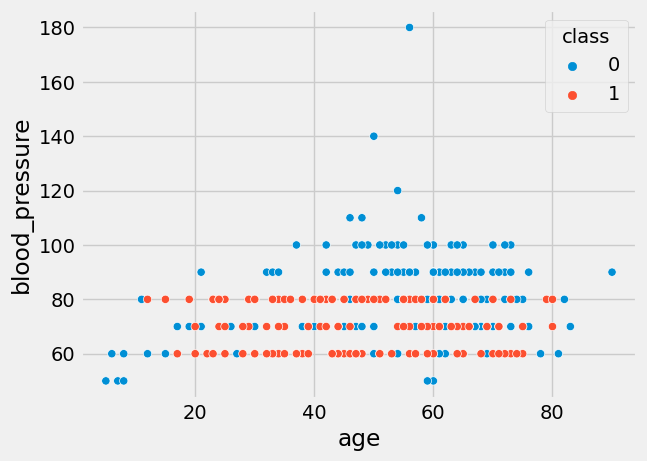

In [247]:
sns.scatterplot(data = df, hue = 'class', x = 'age', y = 'blood_pressure')

In [248]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

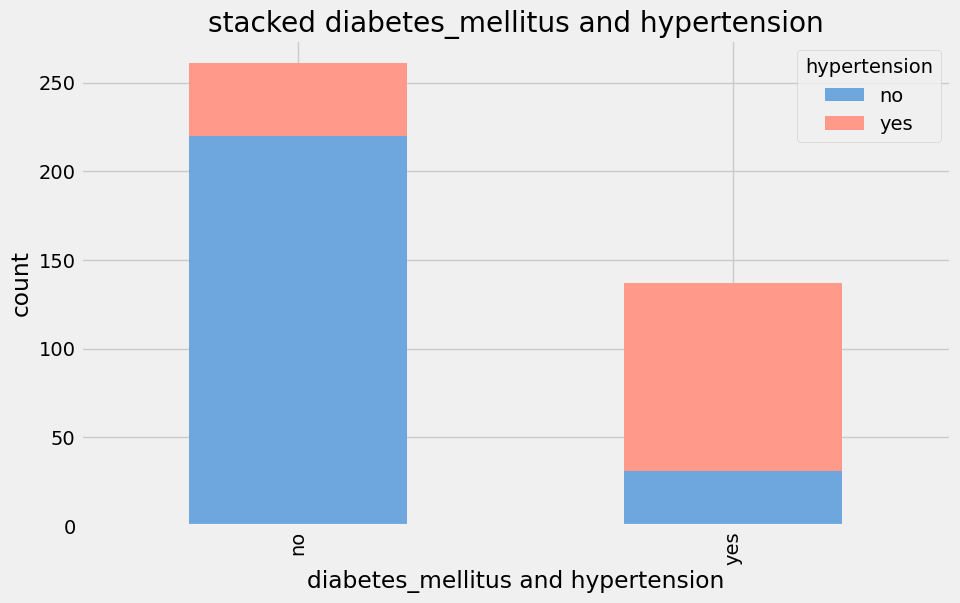

In [250]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind='bar', stacked=True, color = ['#6DA7DE', '#FF9A8B'], figsize = (10, 6))
plt.xlabel("diabetes_mellitus and hypertension")
plt.ylabel("count")
plt.legend(title="hypertension")
plt.title("stacked diabetes_mellitus and hypertension")
plt.show()

In [251]:
def scatter(col1, col2):
    fig = px.scatter(df, x = col1, y=col2, color = "class", template = "plotly_dark")
    return fig.show()
scatter('haemoglobin', 'packed_cell_volume')

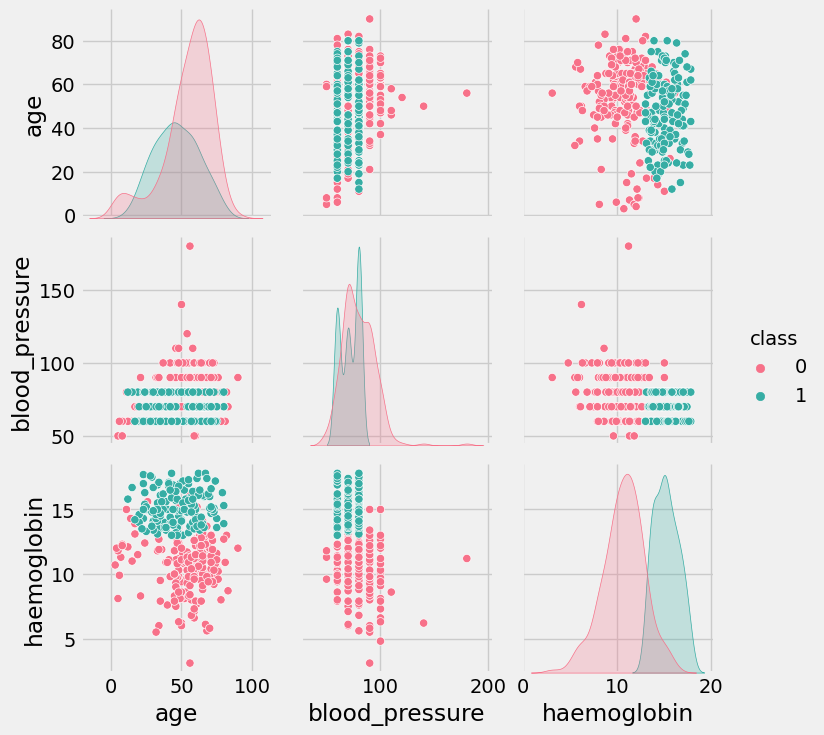

In [252]:
#multivariable analysis

selected_coulmns = ['age', 'blood_pressure', 'haemoglobin', 'class']
sns.pairplot(df[selected_coulmns], hue ='class', palette = 'husl')

<Axes: >

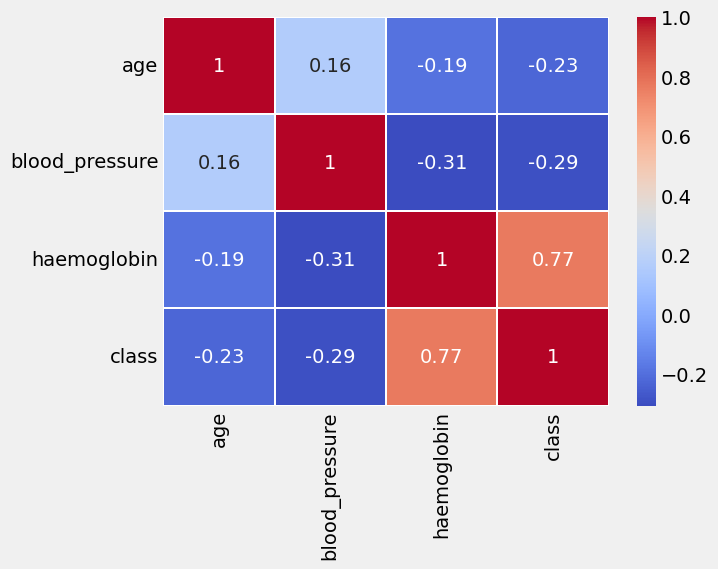

In [256]:
sns.heatmap(df[selected_coulmns].corr(), annot=True, cmap = 'coolwarm', linewidths=0.3)

In [257]:
import plotly.graph_objects as go

heatmap_data = df[selected_coulmns].corr()

fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,
                                x=heatmap_data.columns,
                                y=heatmap_data.index,
                                colorscale='Viridis'))

fig.update_layout(title='Interactive Heatmap of Correlation Matrix')
fig.show()


In [258]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()